In [300]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv -O car_fuel_efficiency.csv

--2025-12-17 14:01:27--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.06s   

2025-12-17 14:01:28 (13.6 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('car_fuel_efficiency.csv')

In [302]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [303]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

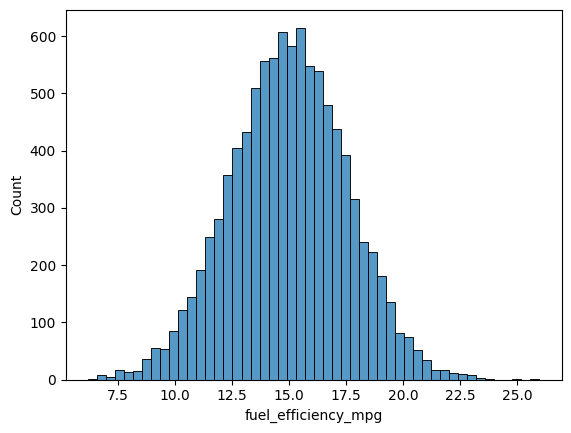

In [304]:
sns.histplot(df['fuel_efficiency_mpg'], bins=50)

# 1

In [305]:
df_prepared = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [306]:
df_prepared.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

# 2

In [307]:
df.horsepower.median()

np.float64(149.0)

In [308]:
n = len(df_prepared)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_train, n_val, n_test


(5824, 1940, 1940)

In [309]:
np.random.seed(42)

idx = np.arange(n)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [310]:
df_train = df_prepared.iloc[idx[:n_train]]
df_val = df_prepared.iloc[idx[n_train:n_train + n_val]]
df_test = df_prepared.iloc[idx[n_train + n_val:]]
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [311]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [312]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [313]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


# 3

In [314]:
df_prepared.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [315]:
df_train_meanna = df_train.fillna(df_train.horsepower.mean())
df_train.fillna(0, inplace=True)

/tmp/ipykernel_3307512/1668445170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(0, inplace=True)


In [316]:
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

del df_train['fuel_efficiency_mpg']
del df_train_meanna['fuel_efficiency_mpg']

del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [317]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]  # bias, weights

In [318]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [319]:
y_train.head()

0    16.642943
1    16.298377
2    18.591822
3    11.818843
4    19.402209
Name: fuel_efficiency_mpg, dtype: float64

In [320]:
w0, w = train_linear_regression(X_train, y_train)

In [321]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

In [322]:
y_pred = w0 + df_val.dot(w)

round(rmse(y_val, y_pred), 2)

np.float64(0.5)

In [323]:
w0_meanna, w_meanna = train_linear_regression(df_train_meanna, y_train)

In [324]:
y_pred_meanna = w0_meanna + df_val.dot(w_meanna)

round(rmse(y_val, y_pred_meanna), 2)

np.float64(0.45)

# 4

In [325]:
def train_linear_regression_regularized(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    n_features = XTX.shape[0]
    XTX_r = XTX + r * np.eye(n_features)
    XTX_inv = np.linalg.inv(XTX_r)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]  # bias, weights

In [326]:
w0, w = train_linear_regression_regularized(df_train, y_train, r=0.0)

y_pred = w0 + df_val.dot(w)

round(rmse(y_val, y_pred), 6)

np.float64(0.49686)

# 5

In [327]:
scores = []
for i in range(10):
    np.random.seed(i)


    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df_prepared.iloc[idx[:n_train]]
    df_val = df_prepared.iloc[idx[n_train:n_train + n_val]]

    df_train.reset_index(drop=True, inplace=True)
    df_val.reset_index(drop=True, inplace=True)

    df_train.fillna(0, inplace=True)
    
    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    
    del df_train['fuel_efficiency_mpg']
    
    del df_val['fuel_efficiency_mpg']

    w0, w = train_linear_regression(df_train, y_train)

    y_pred = w0 + df_val.dot(w)

    scores.append(rmse(y_val, y_pred))

round(np.std(scores), 3)

/tmp/ipykernel_3307512/3564859483.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(0, inplace=True)


np.float64(0.006)

# 6

In [328]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df_prepared.iloc[idx[:n_train]]
df_val = df_prepared.iloc[idx[n_train:n_train + n_val]]
df_test = df_prepared.iloc[idx[n_train + n_val:]]

df_test.reset_index(drop=True, inplace=True)

df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True, inplace=True)

df_full_train.fillna(0, inplace=True)

y_full_train = df_full_train.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

del df_full_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w0, w = train_linear_regression_regularized(df_full_train, y_full_train, r=0.001)
y_pred = w0 + df_test.dot(w)

round(rmse(y_test, y_pred), 3)


np.float64(0.498)